In [ ]:
# 사전 설치
!apt-get update # 리눅스 패키지 업데이트
!apt-get install g++ openjdk-8-jdk # Java 설치

# JPype 설치
!pip install JPype1 # Java와 Python을 연결하는 JPype 설치

# RHINO 설치
!pip install rhinoMorph

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [ ]:
# 형태소 분석기 RHINO 사용 예제

# RHINO 시작
import rhinoMorph
rn = rhinoMorph.startRhino() # 형태소분석기 객체를 rn 이라는 이름으로 생성했다

# 예문 분석
text = "한글테스트 글을 남겨주세요"
sample_data = rhinoMorph.onlyMorph_list(rn, text) # 형태소분석기 객체를 같이 넣는다
print('sample data:', sample_data)

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!
sample data: ['한글', '테스트', '글', '을', '남기', '어', '주', '시', '어요']


In [ ]:
import rhinoMorph
rn = rhinoMorph.startRhino()
text = "한글로 된 한글텍스트를 분석하는 것은 즐겁다."

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


In [ ]:
# 사용 1 : 모든 형태소 보이기
text_analyzed = rhinoMorph.onlyMorph_list(rn, text)
print('\n1. 형태소 분석 결과:', text_analyzed)


1. 형태소 분석 결과: ['한글', '로', '되', 'ㄴ', '한글', '텍스트', '를', '분석', '하', '는', '것', '은', '즐겁', '다', '.']


In [ ]:
# 사용 2 : 실질형태소만, 동사의 어말어미는 제외
text_analyzed = rhinoMorph.onlyMorph_list(rn, text, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
print('\n2. 형태소 분석 결과:', text_analyzed)


2. 형태소 분석 결과: ['한글', '되', '한글', '텍스트', '분석', '즐겁']


In [ ]:
# 사용 3 : 실질형태소만, 동사의 어말어미 포함
text_analyzed = rhinoMorph.onlyMorph_list(rn, text, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
print('\n3. 형태소 분석 결과:', text_analyzed)


3. 형태소 분석 결과: ['한글', '되다', '한글', '텍스트', '분석', '즐겁다']


In [ ]:
# 사용 4 : 전체형태소, 품사정보도 가져 오기
morphs, poses = rhinoMorph.wholeResult_list(rn, text)
print('\n4. 형태소 분석 결과:')
print('morphs:', morphs)
print('poses:', poses)


4. 형태소 분석 결과:
morphs: ['한글', '로', '되', 'ㄴ', '한글', '텍스트', '를', '분석', '하', '는', '것', '은', '즐겁', '다', '.']
poses: ['NNG', 'JKB', 'VV', 'ETM', 'NNG', 'NNG', 'JKO', 'XR', 'XSV', 'ETM', 'NNB', 'JX', 'VA', 'EF', 'SF']


In [ ]:
# 사용 5 : 원문의 어절 정보를 같이 가져 오기
text_analyzed = rhinoMorph.wholeResult_text(rn, text)
print('\n5. 형태소 분석 결과:\n', text_analyzed)


5. 형태소 분석 결과:
 한글로	한글/NNG + 로/JKB
된	되/VV + ㄴ/ETM
한글텍스트를	한글/NNG + 텍스트/NNG + 를/JKO
분석하는	분석/XR + 하/XSV + 는/ETM
것은	것/NNB + 은/JX
즐겁다	즐겁/VA + 다/EF
.	./SF



In [ ]:
# 사용 6, 7 : 한 어절에서 연결된 명사를 하나의 명사로 결합하기
# onlyMorph_list와 wholeResult_list에서 사용 가능하다

text_analyzed = rhinoMorph.onlyMorph_list(rn, text, pos=['NNG', 'NNP', 'NP', 
'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], combineN=True)
print('\n6. 형태소 분석 결과:\n', text_analyzed)
morphs, poses = rhinoMorph.wholeResult_list(rn, text, combineN=True)
print('\n7. 형태소 분석 결과: ')
print('morphs: ', morphs)
print('poses: ', poses)


6. 형태소 분석 결과:
 ['한글', '되', '한글텍스트', '분석', '즐겁']

7. 형태소 분석 결과: 
morphs:  ['한글', '로', '되', 'ㄴ', '한글텍스트', '를', '분석', '하', '는', '것', '은', '즐겁', '다', '.']
poses:  ['NNG', 'JKB', 'VV', 'ETM', 'NNG', 'JKO', 'XR', 'XSV', 'ETM', 'NNB', 'JX', 'VA', 'EF', 'SF']


In [ ]:
# 사용 8, 9 : 어근 + 하 형태를 하나의 동사로 출력하기
# xrVv 아규먼트가 담당하며, 기본값은 False로서 둘을 분리하여 출력한다
# 분리된 어근이 명사인 경우, 명사로 출력된다
# onlyMorph_list, wholeResult_list, wholeResult_text 등 모든 함수에서 사용 가능하다

text_analyzed = rhinoMorph.wholeResult_list(rn, '사랑합니다')
print('\n8. 형태소 분석 결과: ', text_analyzed)
text_analyzed = rhinoMorph.wholeResult_list(rn, '사랑합니다', xrVv=True)
print('\n9. 형태소 분석 결과: ', text_analyzed)


8. 형태소 분석 결과:  (['사랑', '하', 'ㅂ니다'], ['XR', 'XSV', 'EF'])

9. 형태소 분석 결과:  (['사랑하', 'ㅂ니다'], ['VV', 'EF'])


< 참고 : 품사태그 >

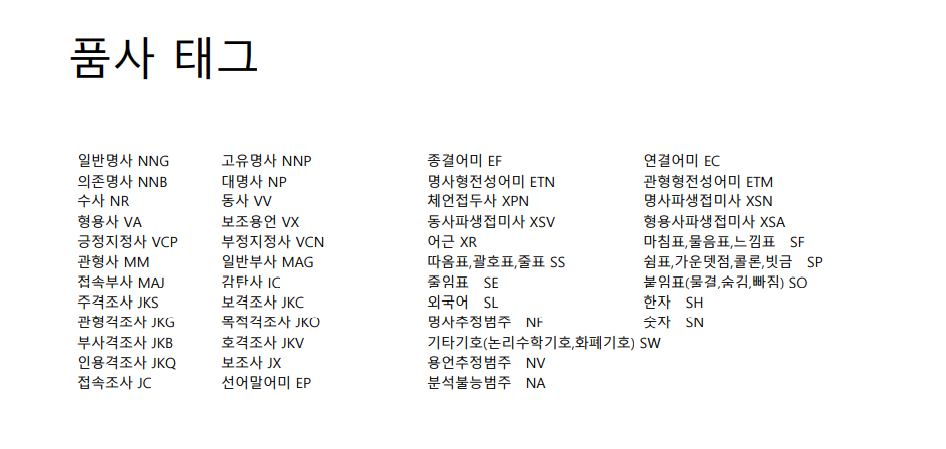